# Meteorite Landing dataset



This dataset was downloaded from the NASA site dedicated to open data at the address: https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh

#### The Data

The dataset contains the following variables:

1. `name`: the name of the place where a meteorite was found or observed.

2. `id`: a unique identifier for a meteorite.

3. `nametype`: one of the following:
    
    - `valid`: a typical meteorite.
    
    - `relict`: a meteorite that has been highly degraded by the weather on Earth.

4. `recclass`: the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics. 

5. `mass (g):` the mass of the meteorite, in grams

6. `fall`: whether the meteorite was seen falling, or was discovered after its impact; one of the following:

    - `Fell`: the meteorite's fall was observed.
    
    - `Found`: the meteorite's fall was not observed.

7. `year`: the year the meteorite fell, or the year it was found (depending on the value of fell).

8. `reclat`: the latitude of the meteorite's landing.

9. `reclong`: the longitude of the meteorite's landing.

10. `GeoLocation`: a parentheses-enclose, comma-separated tuple that combines `reclat` and `reclong` values.



In [1]:
!pip install geopandas

In [2]:
!pip install pycountry_convert

     ---------------------------------------- 10.1/10.1 MB 5.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 201.3/201.3 kB 6.2 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681895 sha256=2297e71adfd95ca92bbf0570fb32fb7516f18fa02449e11b8e58ece34e7604ac
  Stored in directory: c:\users\tanip\appdata\local\pip\cache\wheels\47\15\92\e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [3]:
!pip install reverse_geocoder

     ---------------------------------------- 2.2/2.2 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268068 sha256=34886751935e669226ccd262f7e4ed3346dfdf3cabf58ad69796290787670179
  Stored in directory: c:\users\tanip\appdata\local\pip\cache\wheels\10\05\be\d2edd4ff207cf625ce8bd20cf1493c27838828e8920aff9f4e
Successfully built reverse_geocoder


In [4]:
!pip install folium

     -------------------------------------- 102.3/102.3 kB 2.0 MB/s eta 0:00:00


In [5]:
!pip install geopy

     -------------------------------------- 119.8/119.8 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB 2.0 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
import folium 
from folium.plugins import Draw
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
import pycountry_convert as pc
from tqdm import tqdm

met_df = pd.read_csv('Meteorite_Landings.csv')
met_df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [13]:
met_df.rename(columns={'recclass':'class', 'reclat':'lat', 'reclong':'long', 'mass (g)':'mass'}, inplace=True)
met_df.head()
df=met_df
met_df['year'] = met_df['year'].astype(pd.Int64Dtype())

correct_years_df = met_df[(met_df['year'] >= 860) & (met_df['year'] <= 2013)]

correct_lat_long_df = met_df[(met_df.lat != 0.00000) & (met_df.long != 0.00000)]

correct_lat_long_df['year']=met_df['year']
correct_lat_long_df['year'].dtype
correct_lat_long_df.sort_values(by=['year'],inplace=True)
correct_lat_long_df
#correct_years_df = met_df[(met_df['year'] >= 860) & (met_df['year'] <= 2013)]
correct_long_df = correct_years_df[(correct_years_df['long'] >= -180) & (correct_years_df['long'] <= 180)]
correct_lat_long_df = correct_long_df[~((correct_long_df['lat'] == 0 ) & (correct_long_df['lat'] == 0))]
correct_lat_long_df

C:\Users\tanip\AppData\Local\Temp\ipykernel_139648\1822761614.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_lat_long_df['year']=met_df['year']
C:\Users\tanip\AppData\Local\Temp\ipykernel_139648\1822761614.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_lat_long_df.sort_values(by=['year'],inplace=True)


,name,id,nametype,class,mass,fall,year,lat,long,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003,49.78917,41.50460,"(49.78917, 41.5046)"


In [12]:
correct_lat_long_df.isnull().sum()

name             0
id               0
nametype         0
class            0
mass           107
fall             0
year             0
lat              0
long             0
GeoLocation      0
dtype: int64

In [14]:
correct_lat_long_df[correct_lat_long_df['mass'].isnull()==True]
correct_lat_long_df['mass'].describe()

count    3.170500e+04
mean     1.867359e+04
std      6.892699e+05
min      0.000000e+00
25%      6.530000e+00
50%      3.007000e+01
75%      2.050000e+02
max      6.000000e+07
Name: mass, dtype: float64

In [15]:
#correct_lat_long_df
correct_lat_long_df[correct_lat_long_df.isna().any(axis=1)]
correct_lat_long_df = correct_lat_long_df.dropna()

In [16]:
correct_lat_long_df.shape

(31705, 10)

In [16]:
#sns.distplot(data=correct_lat_long_df)
years_val = correct_lat_long_df['year'].value_counts()
years_val

1979    3045
1988    2295
2003    1714
1999    1578
1990    1506
        ... 
1600       1
1583       1
1575       1
1491       1
2013       1
Name: year, Length: 252, dtype: Int64

31684 of 'Valid' values out of 31705 total
Valid     31684
Relict       21
Name: nametype, dtype: int64


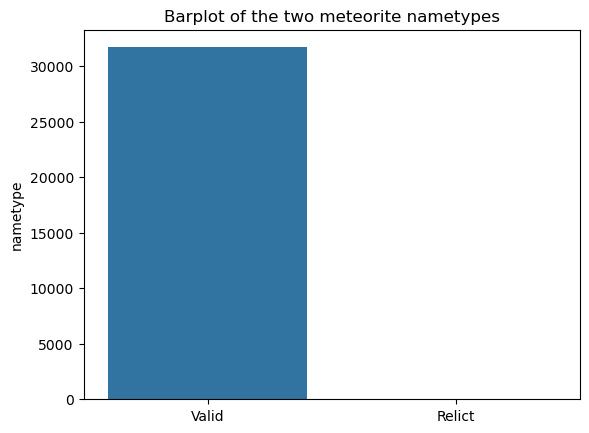

In [22]:
ds_nametype = correct_lat_long_df["nametype"]
ds_nametype_df =df["nametype"]
ds_nametype_val_counts = ds_nametype.value_counts()
print("{} of 'Valid' values out of {} total".format(ds_nametype_val_counts["Valid"], len(ds_nametype)))
nametype_barplot = sns.barplot(x=ds_nametype_val_counts.keys(), y=ds_nametype_val_counts)
nametype_barplot.set_title("Barplot of the two meteorite nametypes")
nametype_barplot
print(ds_nametype_val_counts)

The Meteorite Spread thorughout the globe can be classified into 2 categories 'Valid' and 'Relict'. With the data we can observe that Valid meteorites are more as compared to Relict Meteorites. 

<AxesSubplot:xlabel='year'>

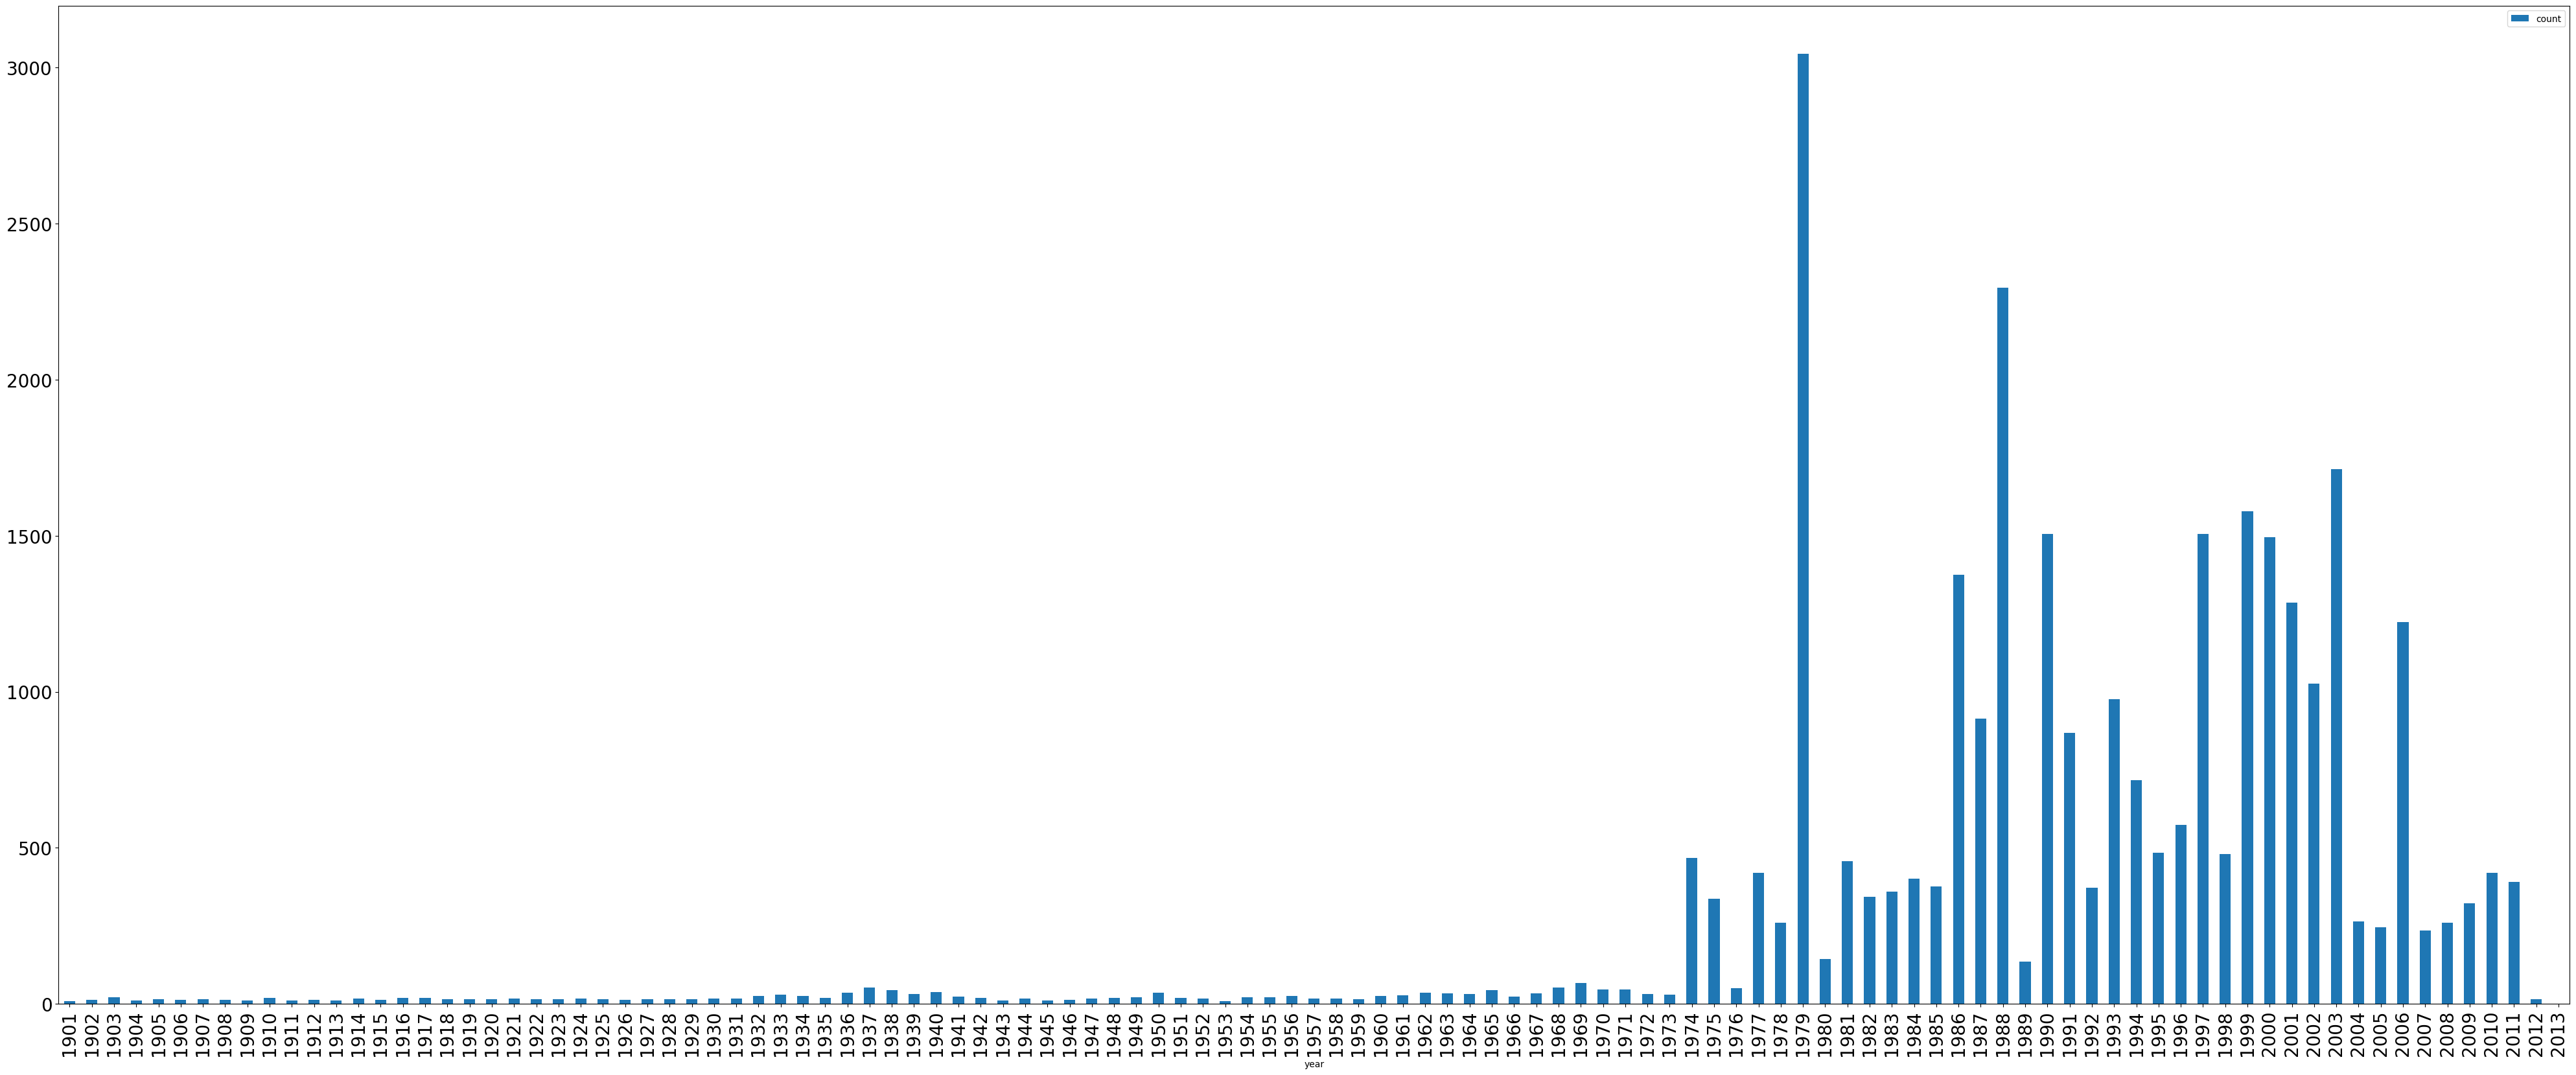

In [23]:
df_year=correct_lat_long_df[correct_lat_long_df['year']>1900].groupby('year').agg(['count']).reset_index()
df_year.plot.bar(x = 'year', y = 'class', figsize=(50, 20), fontsize=20)

# Visualizing Class

#### Reclass on Map

In [27]:
px.scatter_geo(data_frame = correct_lat_long_df, lat = 'lat', lon = 'long', color = 'fall', title = 'Classification of meteorite according to fall and their location')


In [26]:
px.scatter_geo(data_frame = correct_lat_long_df, lat = 'lat', lon = 'long', color = 'nametype', title = 'Classification of meteorite according to nametype and their location')


#### Generalization of classes

Meteorite classification is very precise with more than 35 different classes. However, 3 main categories have to be pointed out :


*   Stony meteorites 
*   Stony-iron meteorites
*   Iron meteorites

In [ ]:
main_meteorite_classes = {
    "stony": ["CI", "CM", "CO", "CV", "CK", "CR", "CH", "CB", "H", "L", "LL", "E", "OC", "LLL", "HL", "EH", "EL", "R", "K", "ACAPULCOITE", "LODRANITE", "WINONAITE", "HOWARDITE", "EUCRITE", "DIOGENITE", "ANGRITE", "AUBRITE", "UREILITE", "BRACHINITE", "LUNAR", "SHERGOTTITE", "NAKHLITE", "CHASSIGNITE", "MARTIAN", "ACHONDRITE", "CHONDRITE", "RELICTOC"],
    "stony_iron": ["PALLASITE", "MESOSIDERITE"],
    "iron": ["IC", "IIAB", "IIC", "IID", "IIF", "IIG", "IIIAB", "IIIE", "IIIF", "IVA", "IVB", "IAB", "UDEI", "PITTS", "sLL", "sLM", "sLH", "sHL", "sHH", "IIE"]
}

def get_category(recclass):
    #to make sure the matching works correctly, we remove any non alpha character
    corrected_recclass = "".join(char for char in recclass if char.isalpha())
    
    #some recclass also contains Iron in their name, if it is so, we directly categorise them.
    if "iron" in corrected_recclass.lower():
        return "iron"
    
    #we loop over the meteorite classes to know if, by any chance, the meteorite is indeed in this class
    for key in main_meteorite_classes.keys():
        
        # we check if the exact recclass of the meteorite is in one of the three arrays. If yes, e return the according key (stony, stony_iron or iron)
        if (corrected_recclass.upper() in main_meteorite_classes[key]):
            return key
        
        # some names are composed of the class and the main category or other strings. Therefore, we loop other each key's array and 
        #check if any name of size more than 3 is inside the recclass of the meteorite (ex: "Pallasite" is in "PallasitePMG" )
        for name in main_meteorite_classes[key]:
            if (len(name) >= 3 and name in corrected_recclass.upper()):
                return key
    
    #print("Unclassified: {}".format(corrected_recclass))
    return "unclassified"

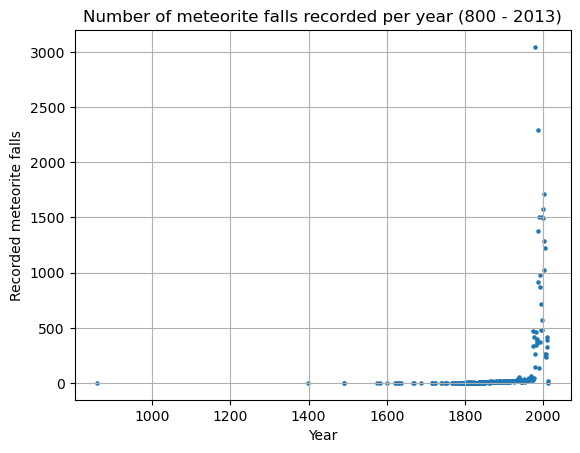

In [17]:
x = years_val.index
y = years_val.values

plt.scatter(x, y, s = 5)
plt.title('Number of meteorite falls recorded per year (800 - 2013)')
plt.xlabel('Year')
plt.ylabel('Recorded meteorite falls')
plt.grid()

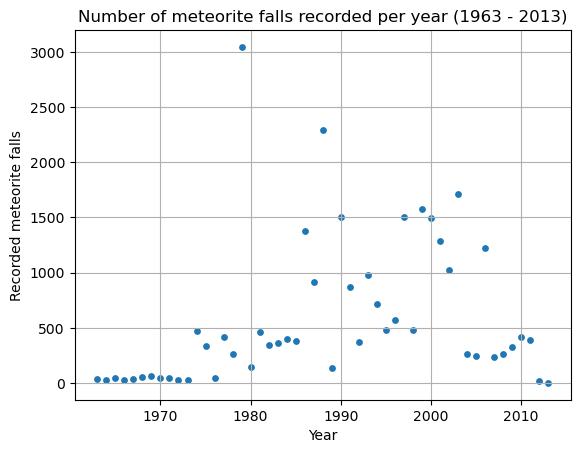

In [19]:
df = correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1963) & (correct_lat_long_df
['year'] <= 2013)]

years_val = df['year'].value_counts()
x = years_val.index
y = years_val.values

plt.scatter(x, y, s = 15)
plt.title('Number of meteorite falls recorded per year (1963 - 2013)')
plt.xlabel('Year')
plt.ylabel('Recorded meteorite falls')
plt.grid()


Text(0.5, 1.0, 'Meteorite falls recorded per mass (mg)')

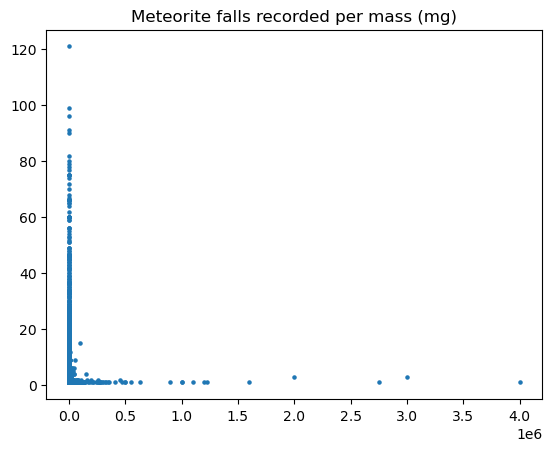

In [21]:
mass_val = df['mass'].value_counts()
x = mass_val.index
y = mass_val.values

plt.scatter(x, y, s = 5)
plt.title("Meteorite falls recorded per mass (mg)")

Text(0, 0.5, 'Quantity counted')

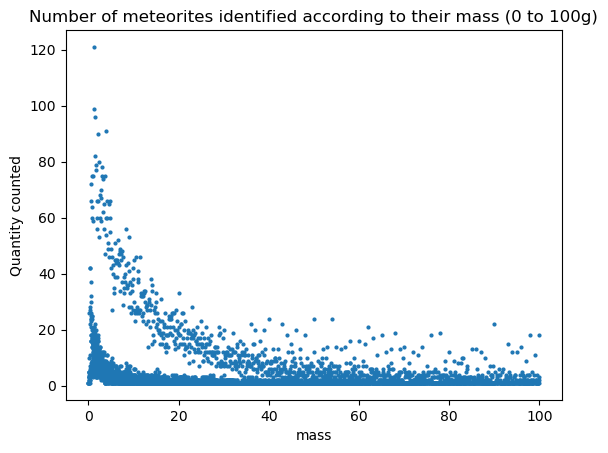

In [23]:
df_mass = df.loc[(df['mass'] > 0) & (df['mass'] <= 100)]
mass_val = df_mass['mass'].value_counts()

x = mass_val.index
y = mass_val.values

plt.scatter(x, y, s = 4)
plt.title('Number of meteorites identified according to their mass (0 to 100g)')
plt.xlabel('mass')
plt.ylabel('Quantity counted')